# Phyton Report 

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [41]:
fb = pd.read_csv("football_data.csv")

In [42]:
fb.shape

(16535, 114)

In [11]:
df.shape

NameError: name 'df' is not defined

In [12]:
for col, val in zip(fb.columns, fb.isna().sum()):
   print(f"{col}: {val}")

Player: 0
Team: 625
Team within selected timeframe: 0
Position: 56
Age: 8
Market value: 0
Contract expires: 7064
Matches played: 0
Minutes played: 0
Goals: 0
xG: 0
Assists: 0
xA: 0
Duels per 90: 232
Duels won, %: 232
Birth country: 5
Passport country: 2
Foot: 1074
Height: 0
Weight: 0
On loan: 0
Successful defensive actions per 90: 232
Defensive duels per 90: 232
Defensive duels won, %: 232
Aerial duels per 90: 232
Aerial duels won, %: 232
Sliding tackles per 90: 232
PAdj Sliding tackles: 0
Shots blocked per 90: 232
Interceptions per 90: 232
PAdj Interceptions: 0
Fouls per 90: 232
Yellow cards: 0
Yellow cards per 90: 174
Red cards: 0
Red cards per 90: 174
Successful attacking actions per 90: 232
Goals per 90: 174
Non-penalty goals: 0
Non-penalty goals per 90: 232
xG per 90: 232
Head goals: 0
Head goals per 90: 232
Shots: 0
Shots per 90: 232
Shots on target, %: 232
Goal conversion, %: 0
Assists per 90: 232
Crosses per 90: 232
Accurate crosses, %: 232
Crosses from left flank per 90: 232
A

In [13]:
fb = fb[~fb["Position"].isna()]

In [14]:
fb = fb[~fb["Age"].isna()]

In [15]:
fb = fb[~fb["Duels per 90"].isna()]

In [16]:
fb2 = fb["Position"].str.get_dummies(", ")

In [17]:


# Merge fb and fb2 based on the index
df = pd.concat([fb, fb2], axis=1)
# Drop the original "Position" column

Forwards

In [18]:
# Filter rows where the "CF" column is equal to 1
Forward = df[df['CF'] == 1]

# Display the result
forward_df = Forward[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90', "Height",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90',
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %", "Received long passes per 90",
"Received passes per 90", "Progressive runs per 90","Head goals", "Head goals per 90","Successful attacking actions per 90",
"Non-penalty goals", "Non-penalty goals per 90","Offensive duels per 90", "Fouls suffered per 90"]] 

Goalkeepers

In [19]:
# Filter rows where the "GK" column is equal to 1
Goalkeepers = df[df["GK"]== 1]
# Display the result and determine usefull features 
goalkeepers_df = Goalkeepers[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 
"Conceded goals per 90", "Shots against per 90", "Prevented goals", "Prevented goals per 90", "Exits per 90","Clean sheets","Save rate, %",
"xG against", "xG against per 90",
"Aerial duels per 90.1", "Accurate short / medium passes, %", "Accurate long passes, %","Long passes per 90", "Passes per 90"]] 

Attacking midfielders

In [20]:
attacking_midfielder_positions = df[(df["AMF"]== 1) | (df['LAMF']== 1 ) | (df['RAMF']== 1 )]
atacking_midfieldrs_df = attacking_midfielder_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists',"xA",'xA per 90', 'Shots',"Goals per 90",
'Shots per 90',"Non-penalty goals","Successful attacking actions per 90",
"Non-penalty goals per 90",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Passes to final third per 90",
"Accurate passes to final third, %","Fouls suffered per 90", "Received long passes per 90","Received passes per 90", 
"Progressive runs per 90","Successful attacking actions per 90",
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %","Key passes per 90",
"Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %", "Progressive passes per 90",
"Accurate progressive passes, %", "Accurate passes to penalty area, %", "Shot assists per 90"]]

Central Midfielders

In [21]:
    central_midfielders_positions = df[(df["RCMF"]== 1) | (df['LCMF']== 1 )]
    central_midfielders_df = central_midfielders_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
    'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists',"xA",'xA per 90', 'Shots',"Goals per 90",
    'Shots per 90',"Non-penalty goals","Successful attacking actions per 90",'Forward passes per 90', 'Accurate passes, %',
    "Non-penalty goals per 90",
    'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Back passes per 90",
    "Accurate back passes, %", "Short / medium passes per 90",
    "Accurate short / medium passes, %",
    "Long passes per 90",
    "Accurate long passes, %",
    "Average pass length, m",
    "Average long pass length, m",
    "Second assists per 90",
    "Third assists per 90",
    "Smart passes per 90",
    "Accurate smart passes, %",
    "Key passes per 90",
    "Passes to final third per 90",
    "Accurate passes to final third, %",
    "Passes to penalty area per 90",
    "Accurate passes to penalty area, %",
    "Through passes per 90",
    "Accurate through passes, %",
    "Progressive passes per 90",
    "Accurate progressive passes, %","Progressive runs per 90"]]

Defensive Midfielders

In [22]:
defensive_midfielder_positions = df[(df["DMF"]== 1) | (df['LDMF']== 1 ) | (df['RDMF']== 1 )]
defensive_midfieders_df = defensive_midfielder_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Second assists per 90",
"Third assists per 90",
"Smart passes per 90",
"Accurate smart passes, %",
"Key passes per 90",
"Passes to final third per 90",
"Accurate passes to final third, %",
"Passes to penalty area per 90",
"Accurate passes to penalty area, %",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

Wingers

In [23]:
winger_positions = df[(df["LW"]== 1) | (df['LWF']== 1 ) | (df['RW']== 1 ) | (df['RWF']== 1 )]
wingers_df = winger_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90',
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Accurate crosses, %",
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %", "Received long passes per 90",
"Received passes per 90", "Progressive runs per 90","Successful attacking actions per 90",
"Non-penalty goals", "Non-penalty goals per 90","Key passes per 90",
"Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %", "Progressive passes per 90",
"Accurate progressive passes, %", "Accurate passes to penalty area, %", "Shot assists per 90","Crosses from left flank per 90",
"Accurate crosses from left flank, %",
"Crosses from right flank per 90", "Crosses per 90",
"Accurate crosses from right flank, %",
"Fouls suffered per 90",
"Back passes per 90",
"Accurate back passes, %",
"Lateral passes per 90",
"Accurate lateral passes, %",
"Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m"]]

Central backs 

In [24]:
Central_backs = df[(df["CB"]== 1) | (df['LCB']== 1 ) | (df['RCB']== 1 )]
Central_backs_df = Central_backs[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90","Height","Head goals", "Head goals per 90",
"Accurate passes, %", 
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

Becks

In [25]:
becks = df[(df["LB"]== 1) | (df['LWB']== 1 ) | (df['RWB']== 1 ) | (df['RB']== 1 )]
becks_df = becks[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90",'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90',
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Accurate crosses, %", "Lateral passes per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

In [26]:
# All of the Breda players 

becks_Breda = becks_df.loc[becks_df['Team within selected timeframe'] == "NAC Breda"]
Central_Breda = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "NAC Breda"]
wingers_Breda = wingers_df.loc[wingers_df['Team within selected timeframe'] == "NAC Breda"]
defensive_midfieders_Breda = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "NAC Breda"]
Central_midfielders_Breda = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "NAC Breda"]
atacking_MF_Breda = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "NAC Breda"]
goalkepers_Breda = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "NAC Breda"]
forward_Breda = forward_df.loc[forward_df['Team within selected timeframe'] == "NAC Breda"]

In [27]:
# All of the PEC Zwolle players 

becks_Zwolle = becks_df.loc[becks_df['Team within selected timeframe'] == "PEC Zwolle"]
Central_Zwolle = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "PEC Zwolle"]
wingers_Zwolle = wingers_df.loc[wingers_df['Team within selected timeframe'] == "PEC Zwolle"]
defensive_midfieders_Zwolle = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "PEC Zwolle"]
Central_midfielders_Zwolle = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "PEC Zwolle"]
atacking_MF_Zwolle = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "PEC Zwolle"]
goalkepers_Zwolle = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "PEC Zwolle"]
forward_Zwolle = forward_df.loc[forward_df['Team within selected timeframe'] == "PEC Zwolle"]

In [28]:
# All of the Heracles players 

becks_Heracles = becks_df.loc[becks_df['Team within selected timeframe'] == "Heracles"]
Central_Heracles = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "Heracles"]
wingers_Heracles = wingers_df.loc[wingers_df['Team within selected timeframe'] == "Heracles"]
defensive_midfieders_Heracles = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "Heracles"]
Central_midfielders_Heracles = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "Heracles"]
atacking_MF_Heracles = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "Heracles"]
goalkepers_Heracles = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "Heracles"]
forward_Heracles = forward_df.loc[forward_df['Team within selected timeframe'] == "Heracles"]

In [29]:
# All of the Almere_City players 
becks_Almere_City = becks_df.loc[becks_df['Team within selected timeframe'] == "Almere City"]
Central_Almere_City = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "Almere City"]
wingers_Almere_City = wingers_df.loc[wingers_df['Team within selected timeframe'] == "Almere City"]
defensive_midfieders_Almere_City = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "Almere City"]
Central_midfielders_Almere_City = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "Almere City"]
atacking_MF_Almere_City = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "Almere City"]
goalkepers_Almere_City = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "Almere City"]
forward_Almere_City = forward_df.loc[forward_df['Team within selected timeframe'] == "Almere City"]

In [30]:
Becks = [becks_Almere_City, becks_Heracles, becks_Zwolle, becks_Breda]
Central_backs = [Central_Almere_City, Central_Heracles, Central_Zwolle, Central_Breda]
wingers = [wingers_Almere_City, wingers_Heracles, wingers_Zwolle, wingers_Breda]
defensive_midfieders = [defensive_midfieders_Almere_City, defensive_midfieders_Heracles, defensive_midfieders_Zwolle, defensive_midfieders_Breda]
Central_midfielders = [Central_midfielders_Almere_City, Central_midfielders_Heracles, Central_midfielders_Zwolle, Central_midfielders_Breda]
atacking_MF = [atacking_MF_Almere_City, atacking_MF_Heracles, atacking_MF_Zwolle, atacking_MF_Breda]
goalkepers = [goalkepers_Almere_City, goalkepers_Heracles ,goalkepers_Zwolle,goalkepers_Breda, ]
forwards = [forward_Almere_City, forward_Heracles, forward_Zwolle , forward_Breda]

In [31]:
features_1 =  ['Age',  
'Matches played', 'Minutes played',"Passes per 90","Height","Head goals", "Head goals per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]
central_defenders = pd.concat (Central_backs)
X_iteration = central_defenders[features_1]
scaler = StandardScaler()
X_iteration1 = scaler.fit_transform(X_iteration)

y_iteration1 = central_defenders["Successful defensive actions per 90"]

# Training and Testing
X_train_iter1, X_test_iter1, y_train_iter1, y_test_iter1 = train_test_split(X_iteration1, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model
model_iter1 = Ridge()

# Train the model
model_iter1.fit(X_train_iter1, y_train_iter1)

# Testing the model
y_pred_iter1 = model_iter1.predict(X_test_iter1)

# Evaluation
mse_iter1 = mean_squared_error(y_test_iter1, y_pred_iter1)
print("Mean Squared Error (Iteration 1):", mse_iter1)
coefficients_iter1 = pd.DataFrame({"Feature": features_1, "Coefficient": model_iter1.coef_})
coefficients_iter1.sort_values(by ="Coefficient" )


NameError: name 'StandardScaler' is not defined

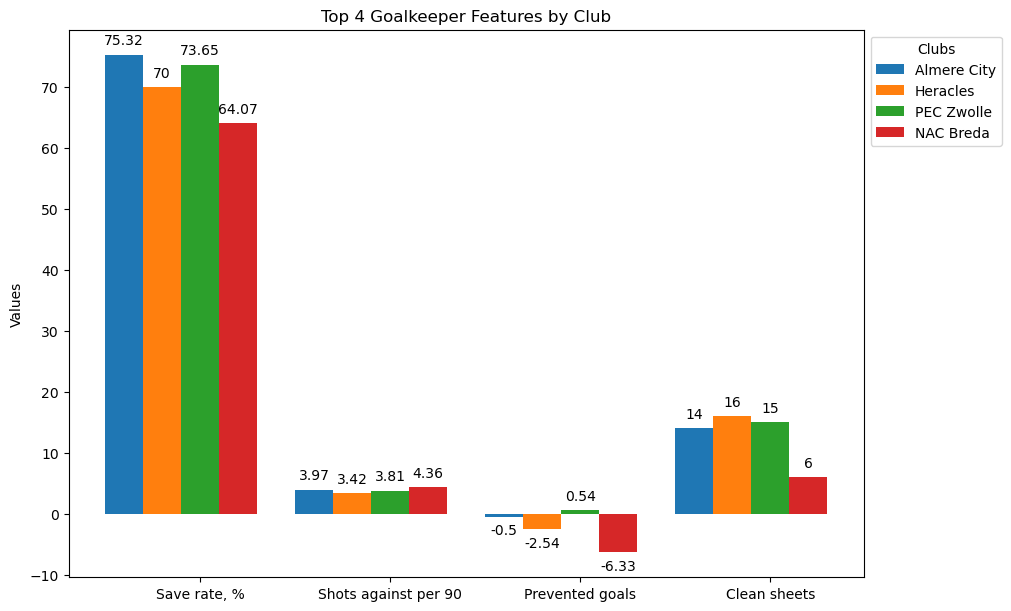

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# List of clubs
clubs = ["Almere City", "Heracles", "PEC Zwolle", "NAC Breda"]

# Dictionary of goalkeeper dataframes for each club
goalkeepers_data = {"Almere City": goalkepers_Almere_City, "Heracles": goalkepers_Heracles, "PEC Zwolle": goalkepers_Zwolle, "NAC Breda": goalkepers_Breda}

# List of top 5 features for goalkeepers
top_features = ["Save rate, %", "Shots against per 90", "Prevented goals", "Clean sheets"]

# Set up the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# Set the positions for each group of bars
x = np.arange(len(clubs))
width = 0.2  # the width of the bars

# Iterate through each club and plot the top 5 features for goalkeepers
for i, club in enumerate(clubs):
    goalkeeper_df = goalkeepers_data[club]
    offset = width * i
    rects = ax.bar(x + offset, goalkeeper_df[top_features].mean().values, width, label=club)
    ax.bar_label(rects, padding=5)

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Top 4 Goalkeeper Features by Club')
ax.set_xticks(x + (width * len(clubs) / 2))
ax.set_xticklabels(top_features)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clubs')

plt.show()


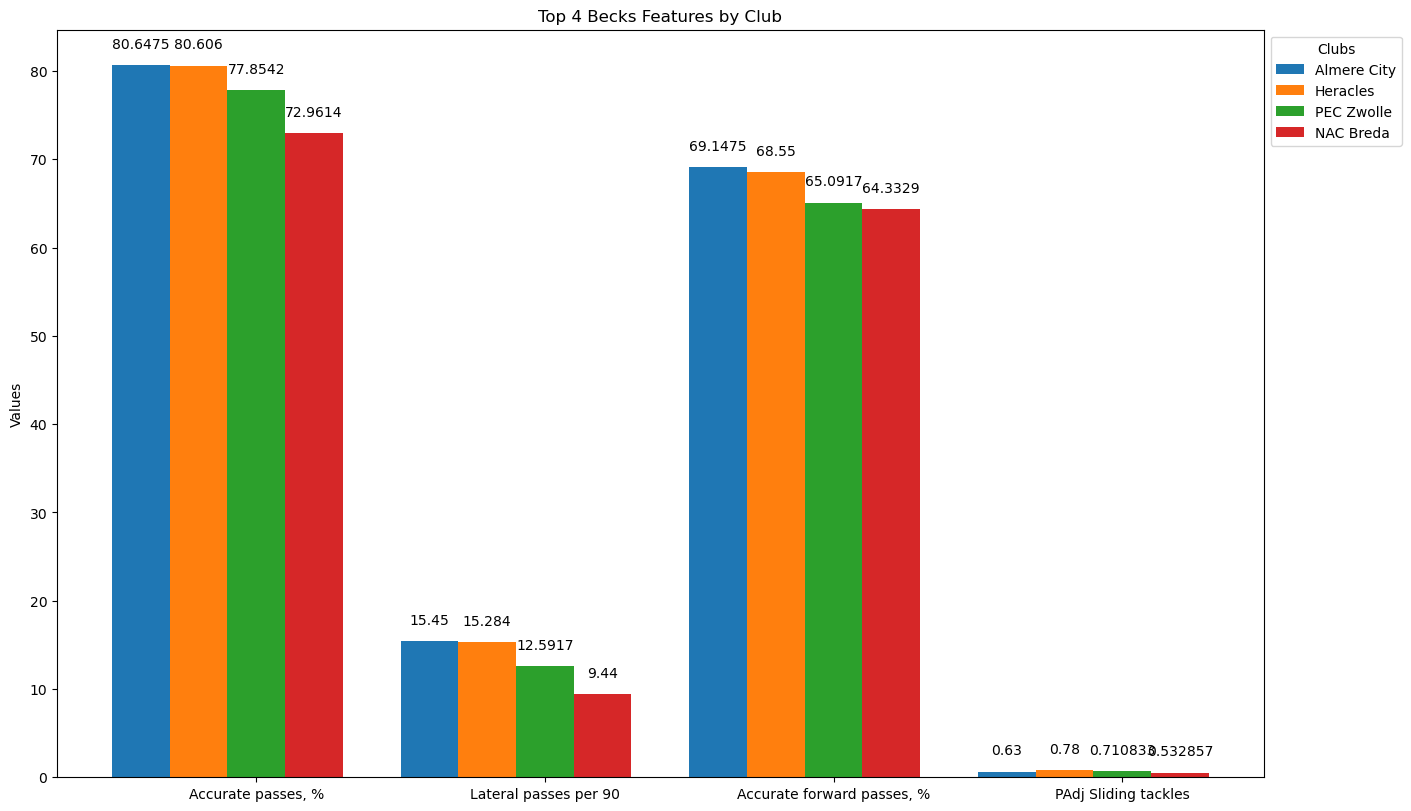

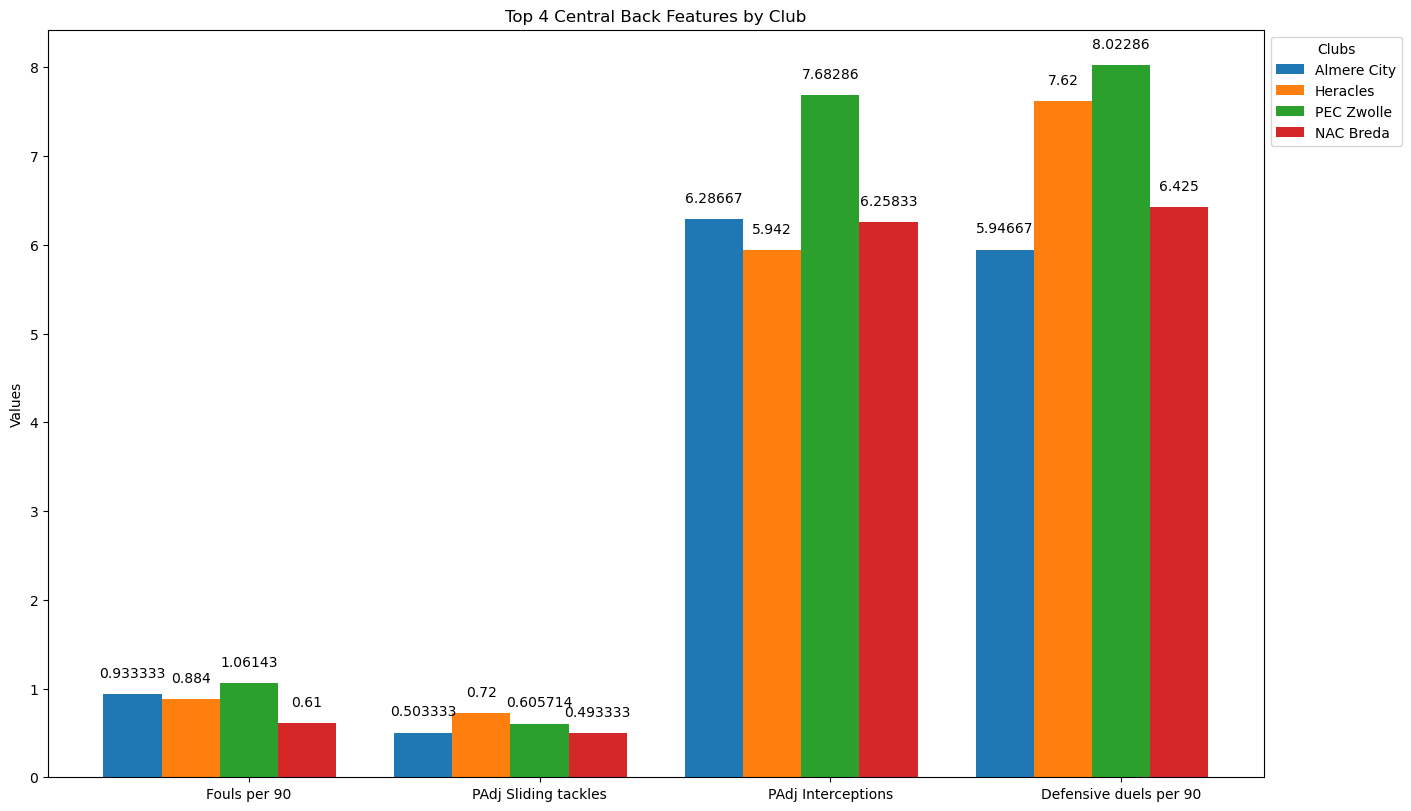

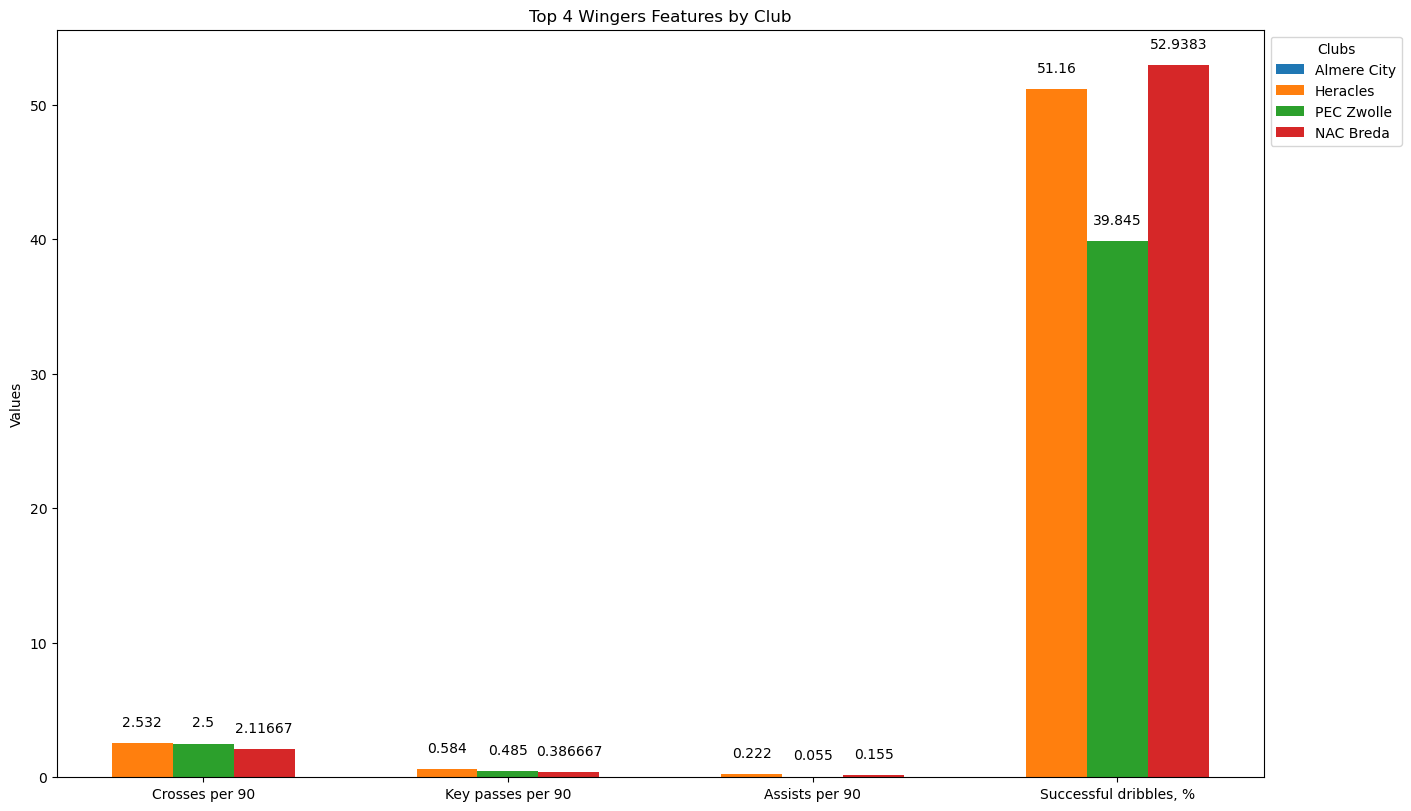

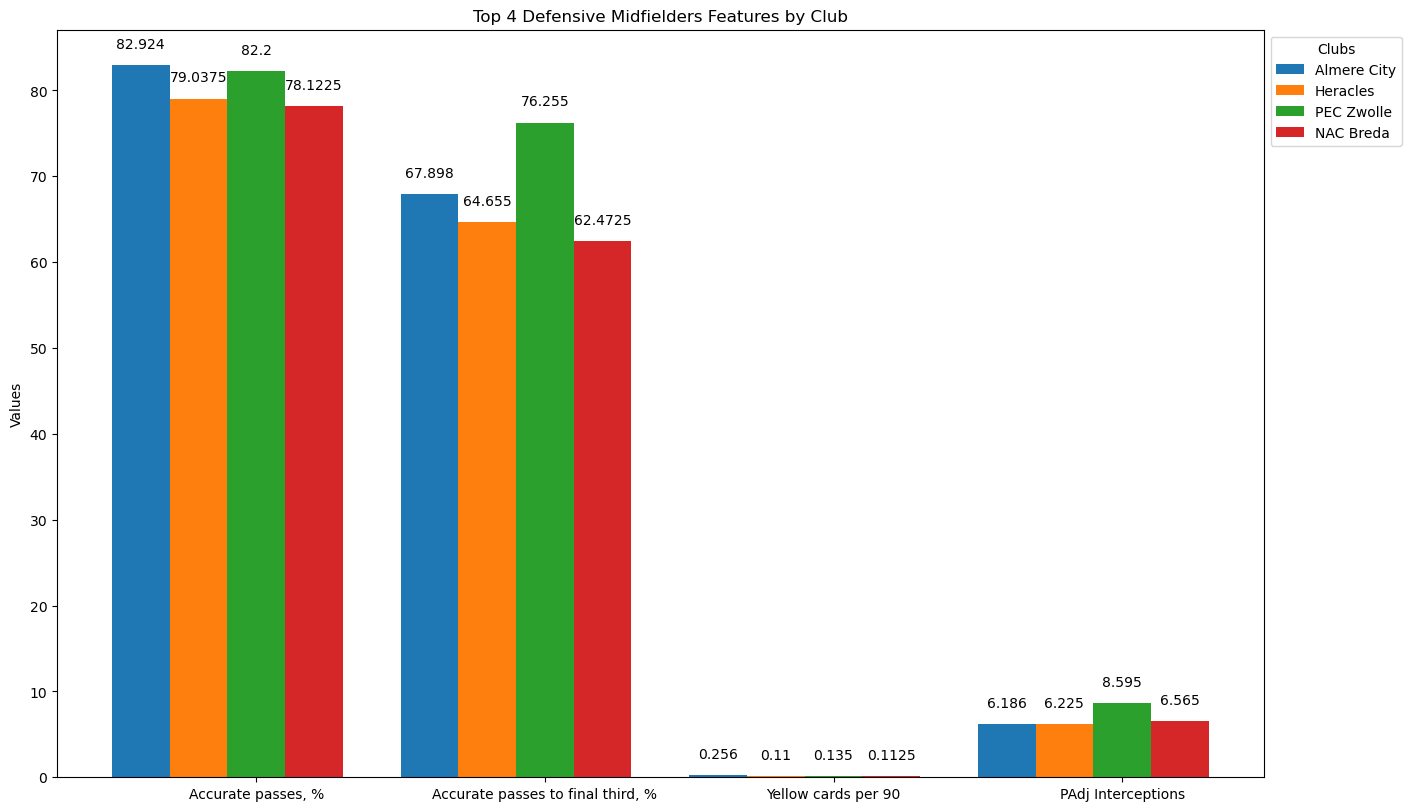

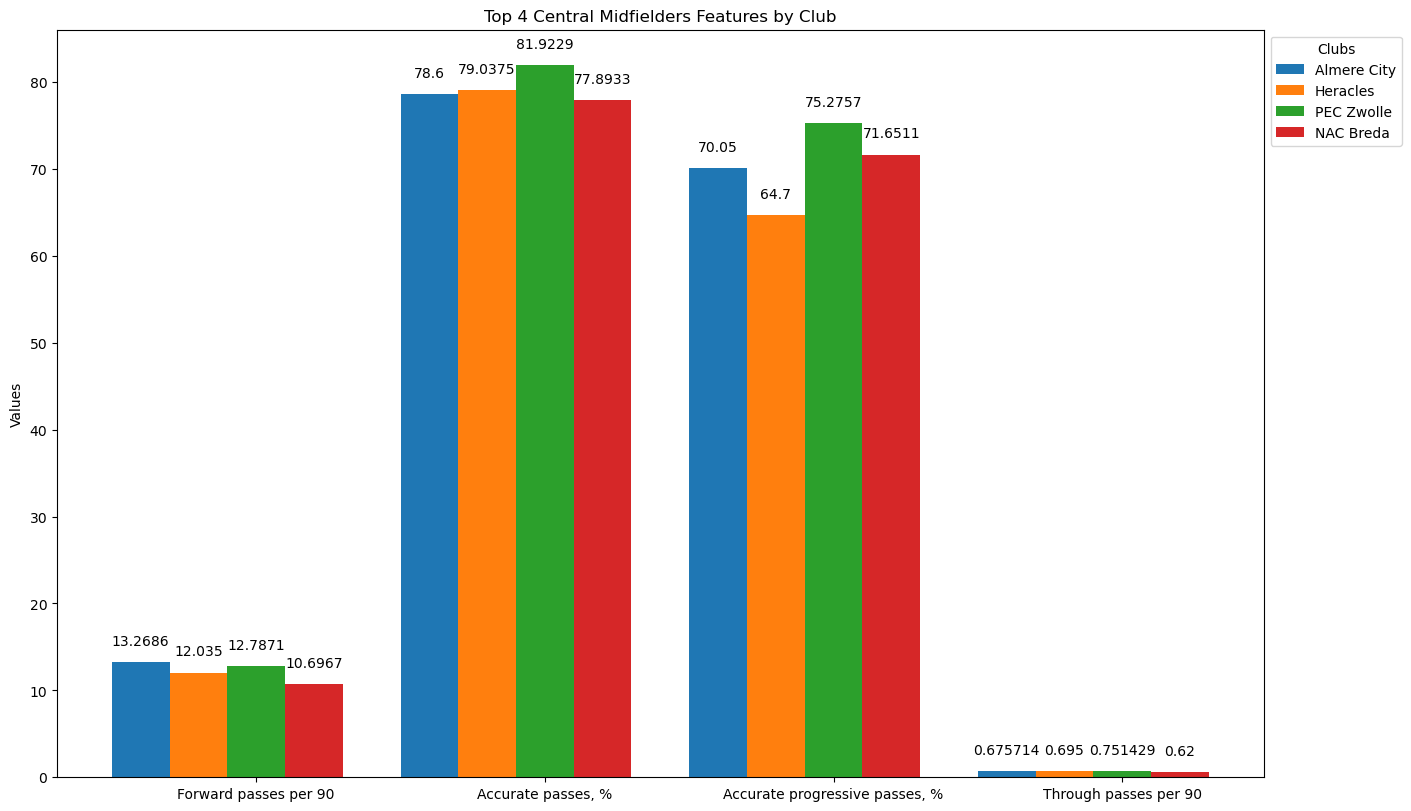

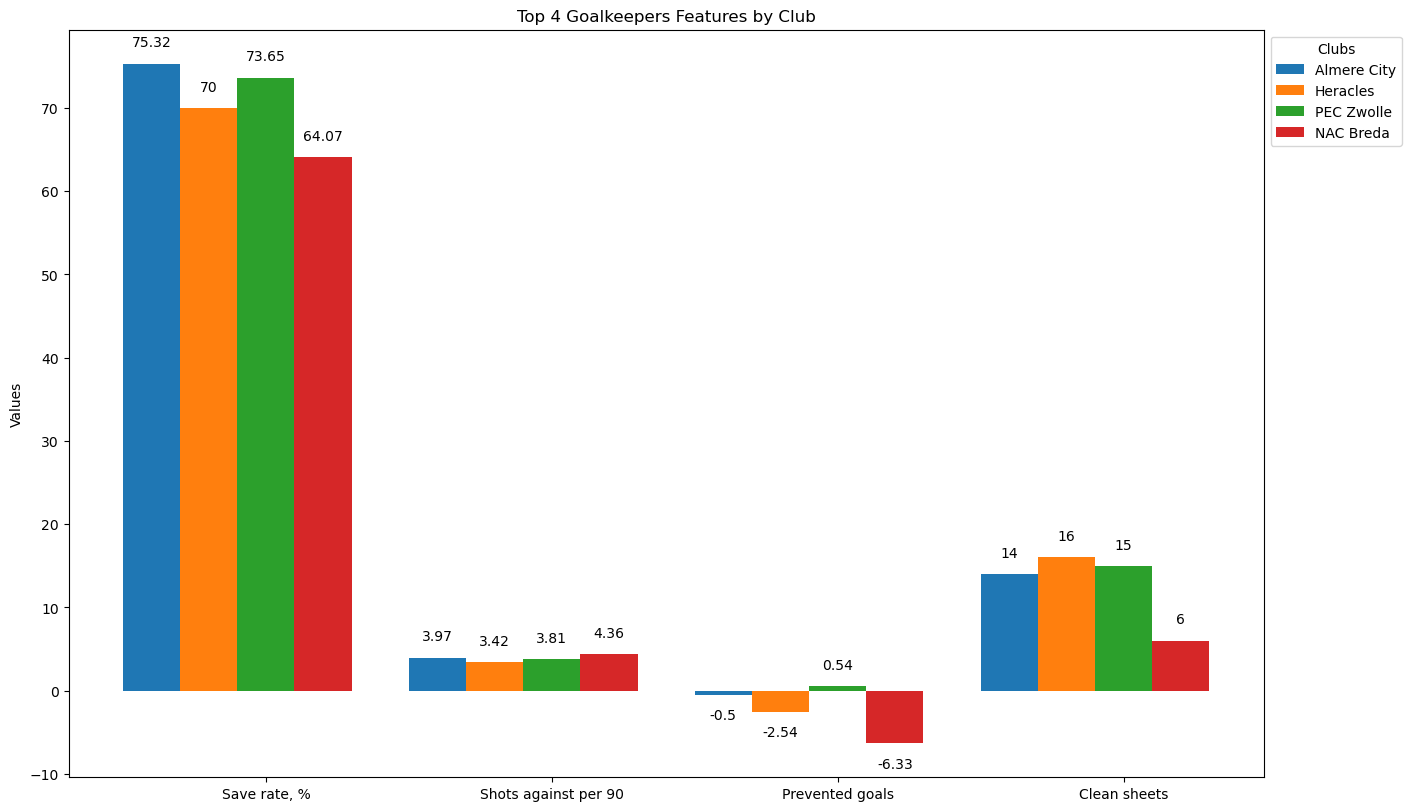

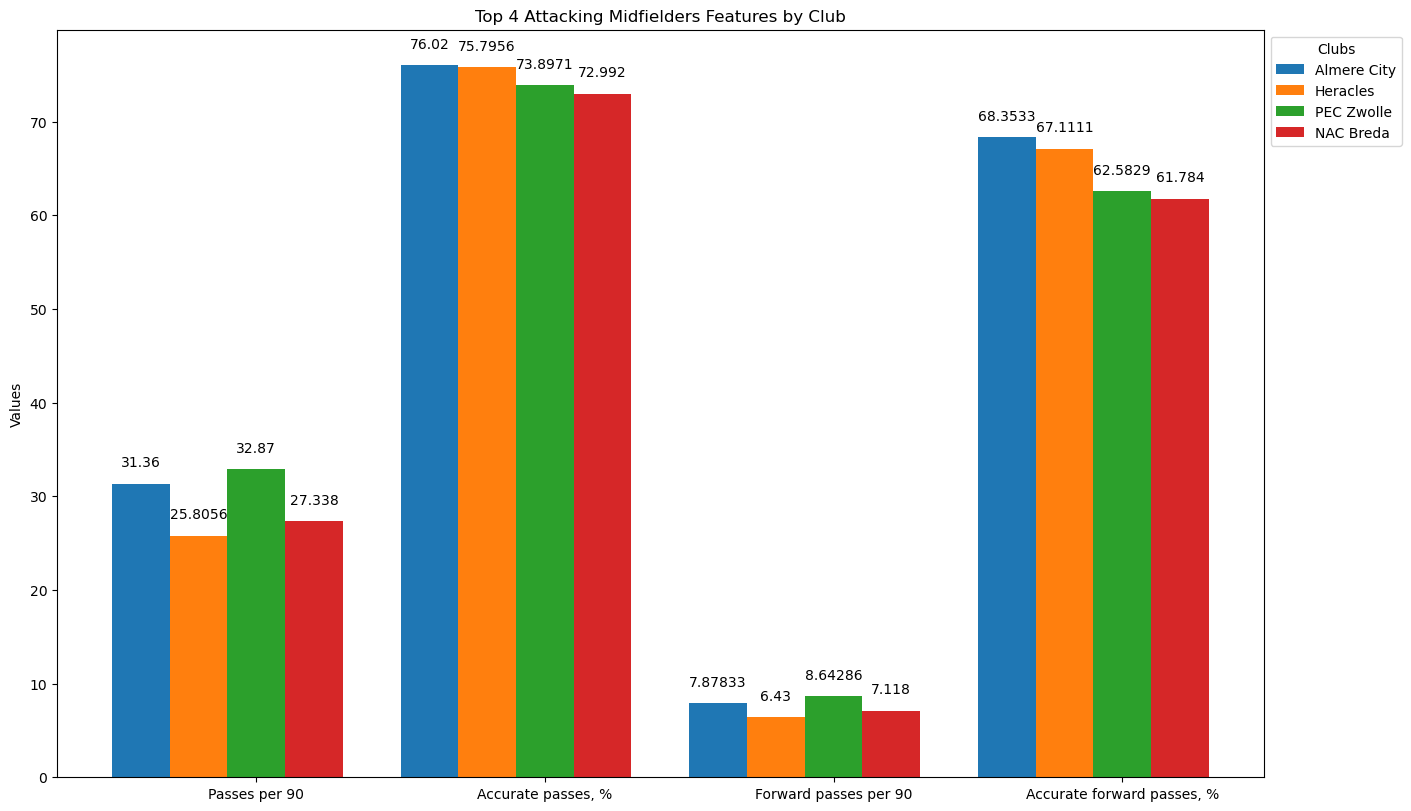

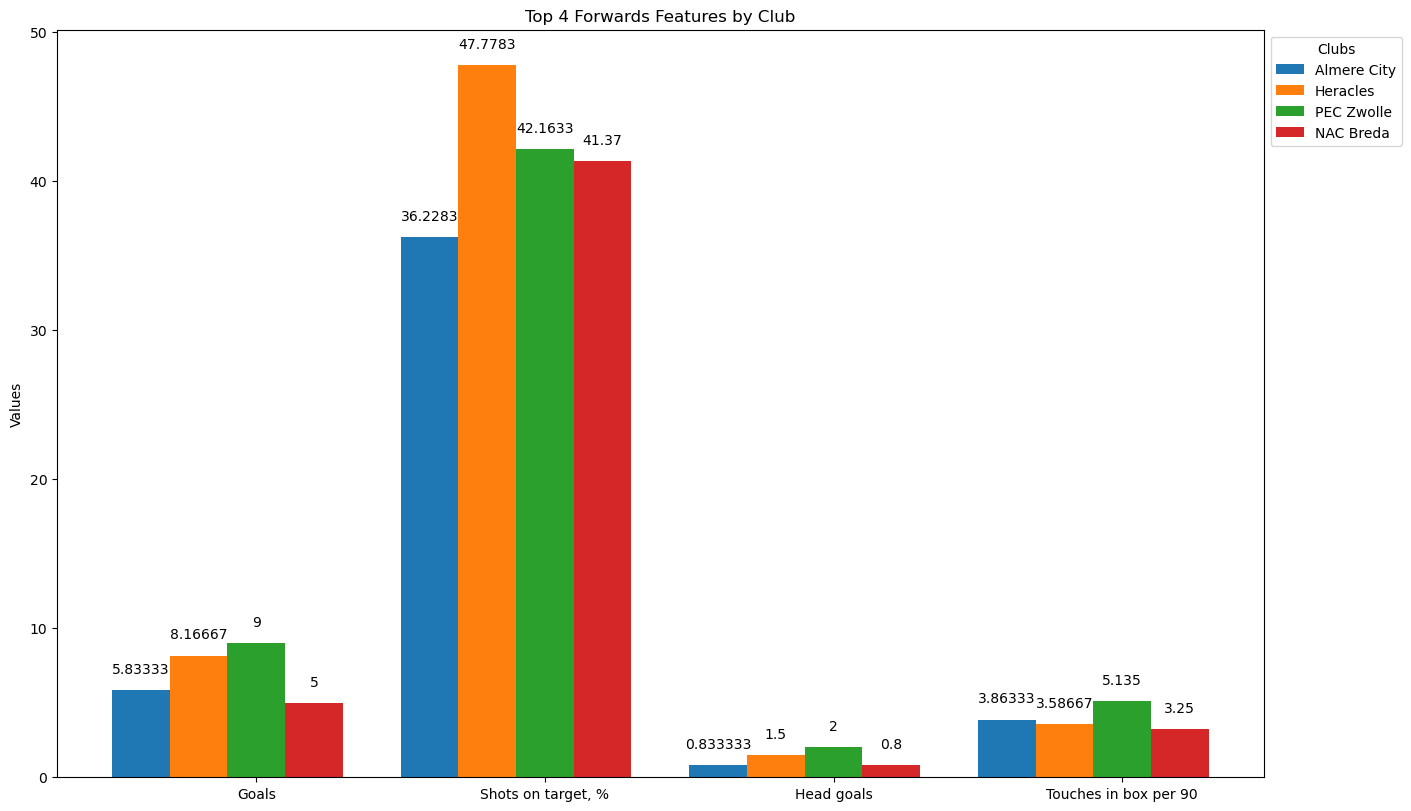

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def create_position_visualization(position_data, position_name, top_features, figsize=(14, 8)):
    # Set up the figure and axes with the specified size
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)

    # List of clubs
    clubs = position_data.keys()

    # Set the positions for each group of bars
    x = np.arange(len(clubs))
    width = 0.2  # the width of the bars

    # Iterate through each club and plot the top features for the position
    for i, club in enumerate(clubs):
        player_df = position_data[club]
        offset = width * i
        rects = ax.bar(x + offset, player_df[top_features].mean().values, width, label=club)
        ax.bar_label(rects, padding=10)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Values')
    ax.set_title(f'Top {len(top_features)} {position_name} Features by Club')
    ax.set_xticks(x + (width * len(clubs) / 2))
    ax.set_xticklabels(top_features)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clubs')

    plt.show()

# Example usage for different positions
# Fill in the features for each position
features_becks = ["Accurate passes, %","Lateral passes per 90","Accurate forward passes, %","PAdj Sliding tackles"]
features_central = ["Fouls per 90","PAdj Sliding tackles",	"PAdj Interceptions",	"Defensive duels per 90"]
features_wingers = ["Crosses per 90", "Key passes per 90", "Assists per 90", "Successful dribbles, %"]
features_defensive_midfielders = ["Accurate passes, %", "Accurate passes to final third, %", "Yellow cards per 90", "PAdj Interceptions"]
features_Central_midfielders = ["Forward passes per 90", "Accurate passes, %", "Accurate progressive passes, %", "Through passes per 90"]
features_goalkeepers = ["Save rate, %", "Shots against per 90", "Prevented goals", "Clean sheets"]
features_attacking_midfielders = ["Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %"]
features_forwards = ["Goals", "Shots on target, %", "Head goals", "Touches in box per 90"]

# Fill in the corresponding datasets
becks_data = {"Almere City": becks_Almere_City, "Heracles": becks_Heracles, "PEC Zwolle": becks_Zwolle, "NAC Breda": becks_Breda}
central_data = {"Almere City": Central_Almere_City, "Heracles": Central_Heracles, "PEC Zwolle": Central_Zwolle, "NAC Breda": Central_Breda}
wingers_data = {"Almere City": wingers_Almere_City, "Heracles": wingers_Heracles, "PEC Zwolle": wingers_Zwolle, "NAC Breda": wingers_Breda}
defensive_midfielders_data = {"Almere City": defensive_midfieders_Almere_City, "Heracles": defensive_midfieders_Heracles, "PEC Zwolle": defensive_midfieders_Zwolle, "NAC Breda": defensive_midfieders_Breda}
Central_midfielders_data = {"Almere City": Central_midfielders_Almere_City, "Heracles": Central_midfielders_Heracles, "PEC Zwolle": Central_midfielders_Zwolle, "NAC Breda": Central_midfielders_Breda}
attacking_midfielders_data = {"Almere City": atacking_MF_Almere_City, "Heracles": atacking_MF_Heracles, "PEC Zwolle": atacking_MF_Zwolle, "NAC Breda": atacking_MF_Breda}
goalkeepers_data = {"Almere City": goalkepers_Almere_City, "Heracles": goalkepers_Heracles, "PEC Zwolle": goalkepers_Zwolle, "NAC Breda": goalkepers_Breda}
forwards_data = {"Almere City": forward_Almere_City, "Heracles": forward_Heracles, "PEC Zwolle": forward_Zwolle, "NAC Breda": forward_Breda}

# Create visualizations for each position
create_position_visualization(becks_data, "Becks", features_becks)
create_position_visualization(central_data, "Central Back", features_central)
create_position_visualization(wingers_data, "Wingers", features_wingers)
create_position_visualization(defensive_midfielders_data, "Defensive Midfielders", features_defensive_midfielders)
create_position_visualization(Central_midfielders_data, "Central Midfielders", features_Central_midfielders)
create_position_visualization(goalkeepers_data, "Goalkeepers", features_goalkeepers)
create_position_visualization(attacking_midfielders_data, "Attacking Midfielders", features_attacking_midfielders)
create_position_visualization(forwards_data, "Forwards", features_forwards)


#### All of the Teams different metrics 

In [34]:
# selecting all of the players from the teams 
Almere_city__all_players = df[df['Team within selected timeframe'] == "Almere City"]
Heracles__all_players = df[df['Team within selected timeframe'] == "Heracles"]
Pec_Zwolle_all_players = df[df['Team within selected timeframe'] == "PEC Zwolle"]
Breda__all_players = df[df['Team within selected timeframe'] == "NAC Breda"]

C:\Users\35988\AppData\Local\Temp\ipykernel_4156\3413838055.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = plt.cm.get_cmap('tab10', len(team_names))


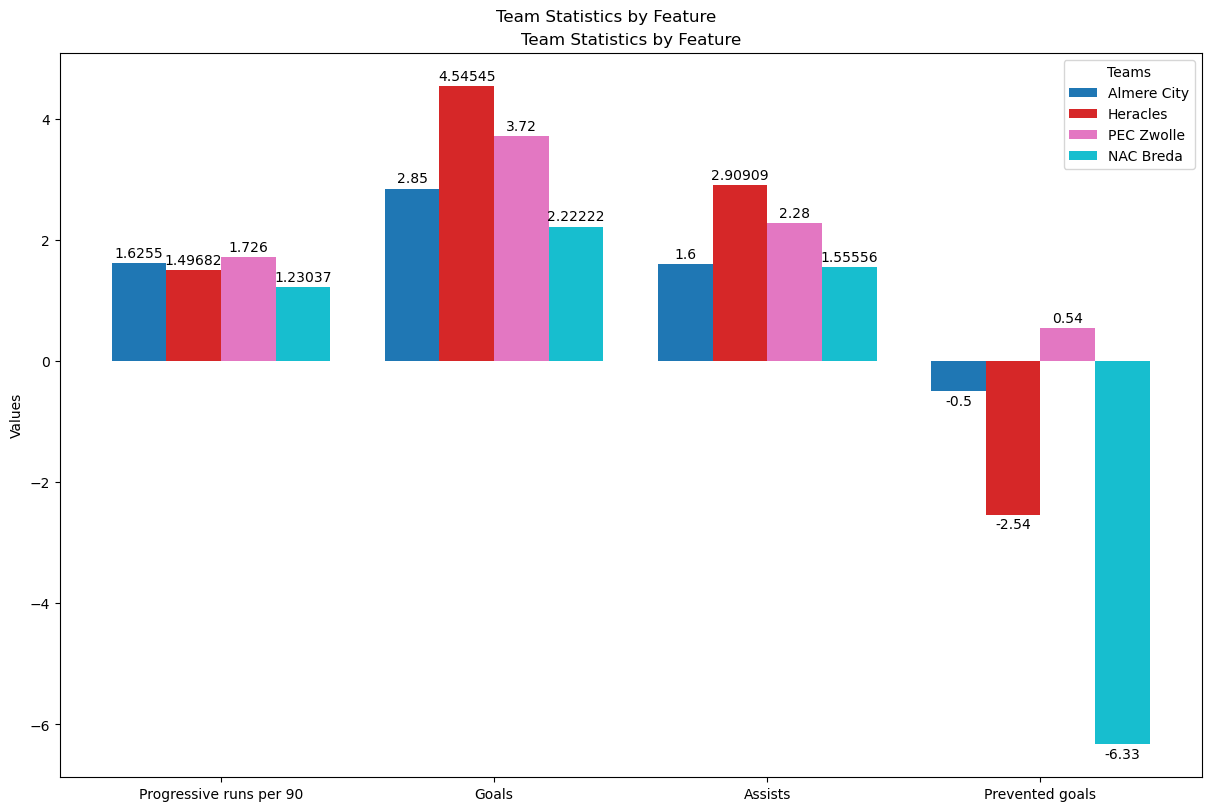

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def create_team_visualization_all_teams(team_datasets, team_names, top_features, figsize=(12, 8)):
    # Set up the figure and axes with the specified size
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    fig.suptitle('Team Statistics by Feature')

    # Set the positions for each group of bars
    x = np.arange(len(top_features))
    width = 0.2  # the width of the bars

    # Set up color cycle for teams
    color_cycle = plt.cm.get_cmap('tab10', len(team_names))

    # Iterate through each team and plot the team statistics for each feature
    for i, (team_data, team_name) in enumerate(zip(team_datasets, team_names)):
        offset = width * i
        color = color_cycle(i)
        rects = ax.bar(x + offset, [team_data[feature].mean() for feature in top_features], width, label=team_name, color=color)
        ax.bar_label(rects, padding=2)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Values')
    ax.set_title('Team Statistics by Feature')
    ax.set_xticks(x + (width * (len(team_names) - 1) / 2))
    ax.set_xticklabels(top_features)

    # Place legend in the top right corner
    ax.legend(loc='upper right', title="Teams")

    plt.show()

# Example usage for all teams
# Fill in the features for all teams
features_all_teams = ["Progressive runs per 90", "Goals", "Assists", "Prevented goals"]

# Fill in the corresponding datasets for all teams
all_teams_datasets = [Almere_city__all_players, Heracles__all_players, Pec_Zwolle_all_players, Breda__all_players]
all_teams_names = ["Almere City", "Heracles", "PEC Zwolle", "NAC Breda"]

# Create visualization for all teams
create_team_visualization_all_teams(all_teams_datasets, all_teams_names, features_all_teams)


### Trying to make two algorithms to predict what players should NAC buy 

In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



# Filter out rows with missing contract expiration dates
filtered_fb = df.dropna(subset=['Contract expires'])
filtered_fb['Contract expires'] = pd.to_datetime(filtered_fb['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
filtered_fb['Contract duration'] = (filtered_fb['Contract expires'] - today).dt.days

# Specify the team for which you want to recommend players (e.g., NAC Breda)
target_team = "NAC Breda"

# Filter players for the target team with contracts expiring soon
target_team_players = filtered_fb[filtered_fb['Team within selected timeframe'] == target_team]

# Select players with contracts expiring soon or already expired
players_to_buy = target_team_players[target_team_players['Contract duration'] <= 365]  # Adjust the threshold as needed

# Select players in the specified market value range
market_value_range = (100_00, 500_000)
players_to_buy = players_to_buy[(players_to_buy['Market value'] >= market_value_range[0]) & 
                                (players_to_buy['Market value'] <= market_value_range[1])]

# Display the recommended players
print("Recommended Players for", target_team)
print(players_to_buy[['Player', 'Position', 'Contract expires', 'Market value', 'Contract duration']])


Recommended Players for NAC Breda
                  Player          Position Contract expires  Market value  \
11136        T. Velthuis           LCB, CB       2024-06-30        500000   
11188  A. Garcia McNulty          LCB, RCB       2024-06-30        400000   
11189   J. van der Sande                CF       2024-06-30        400000   
11222         S. Agougil  RCMF, LCMF, RDMF       2024-06-30        350000   
11223      V. Wernersson                LB       2024-06-30        350000   
11257            A. Plat         DMF, LDMF       2024-06-30        325000   
11259             J. Vet     CB, RCMF, DMF       2024-06-30        325000   
11289         M. Garbett          RCMF, RW       2024-06-30        300000   
11292       Cuco Martina           RCB, CB       2024-06-30        300000   
11344          R. Ligeon           LWB, LB       2023-06-30        250000   
11347        J. Herrmann     CF, RAMF, RWF       2024-06-30        250000   
11478     L. Marijnissen               RCB

C:\Users\35988\AppData\Local\Temp\ipykernel_4156\940693543.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fb['Contract expires'] = pd.to_datetime(filtered_fb['Contract expires'], format='%Y-%m-%d')
C:\Users\35988\AppData\Local\Temp\ipykernel_4156\940693543.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fb['Contract duration'] = (filtered_fb['Contract expires'] - today).dt.days


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your original DataFrame
# One-hot encode 'Position'


# Filter out rows with missing contract expiration dates
filtered_df = df.dropna(subset=['Contract expires'])
filtered_df['Contract expires'] = pd.to_datetime(filtered_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
filtered_df['Contract duration'] = (filtered_df['Contract expires'] - today).dt.days

# Train a Linear Regression model
features = ['Contract duration'] + list(.columns)  # Include one-hot encoded position columns
X = filtered_df[features]
y = filtered_df['Goals scored']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Feature Importance Analysis
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.coef_})
print("Feature Importance:")
print(feature_importance)

# Recommendation
target_team = "NAC Breda"
target_team_players = filtered_df[filtered_df['Team within selected timeframe'] == target_team]

# Predict market value using the trained model
target_team_players['Predicted Market value'] = model.predict(target_team_players[features])

# Select players based on predictions and other criteria
players_to_buy = target_team_players[(target_team_players['Contract duration'] <= 365) &
                                     (target_team_players['Predicted Market value'] >= market_value_range[0]) &
                                     (target_team_players['Predicted Market value'] <= market_value_range[1])]

# Display the recommended players
print("Recommended Players for", target_team)
print(players_to_buy[['Player', 'Contract expires', 'Market value', 'Contract duration', 'Predicted Market value']])


In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]

# Check for missing values and handle them if needed

# Convert categorical variables into numerical format (if any)
# Example: goalkeepers_df['Foot'] = pd.Categorical(goalkeepers_df['Foot']).codes

# Define the list of features
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 
    'Accurate short / medium passes, %', 'Exits per 90', 'Passes per 90',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Linear Regression model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_goalkeepers = LinearRegression()
model_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Feature Importance Analysis
feature_importance_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_goalkeepers.coef_})
feature_importance_goalkeepers = feature_importance_goalkeepers.sort_values(by='Importance', ascending=False)
print("Goalkeeper Feature Importance:")
print(feature_importance_goalkeepers)

# Recommendation
target_team_goalkeepers = "NAC Breda"
target_team_goalkeepers_df = goalkeepers_df[goalkeepers_df['Team within selected timeframe'] == target_team_goalkeepers]

# Define market_value_range
market_value_range = (100_000, 500_000)

# Predict market value using the trained model
target_team_goalkeepers_df['Predicted Market value'] = model_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Select goalkeepers based on predictions and other criteria
goalkeepers_to_buy = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Contract duration'] <= 0) &
    (target_team_goalkeepers_df['Predicted Market value'] >= market_value_range[0]) &
    (target_team_goalkeepers_df['Predicted Market value'] <= market_value_range[1])
]

# Display the recommended goalkeepers
print("\nRecommended Goalkeepers for", target_team_goalkeepers)
print(goalkeepers_to_buy[['Player', 'Contract expires', 'Market value', 'Contract duration', 'Predicted Market value']])


Goalkeeper Feature Importance:
                              Feature    Importance
14                  xG against per 90  9.613962e+00
13               Shots against per 90  8.099227e-01
2                        Clean sheets  6.244737e-01
1               Aerial duels per 90.1  3.190095e-01
15                         xG against  1.759888e-01
4                        Exits per 90  1.608129e-01
6             Accurate long passes, %  1.167886e-02
9                                 Age  4.372452e-03
5                       Passes per 90  3.463237e-03
10                       Market value  8.421199e-08
12                     Minutes played -3.259751e-03
3   Accurate short / medium passes, % -3.663444e-02
0                        Save rate, % -9.070483e-02
7                  Long passes per 90 -9.442188e-02
11                     Matches played -9.953818e-02
8               Conceded goals per 90 -1.259091e+01

Recommended Goalkeepers for NAC Breda
Empty DataFrame
Columns: [Player, Contract exp

C:\Users\35988\AppData\Local\Temp\ipykernel_7492\3270567470.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_team_goalkeepers_df['Predicted Market value'] = model_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])


In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]

# Check for missing values and handle them if needed

# Convert categorical variables into numerical format (if any)
# Example: goalkeepers_df['Foot'] = pd.Categorical(goalkeepers_df['Foot']).codes

# Define the list of features
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 'Prevented goals per 90',
    'Accurate short / medium passes, %', 'Exits per 90', 'Passes per 90',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Linear Regression model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']  # Use 'Prevented goals' as the target variable

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_goalkeepers = LinearRegression()
model_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Feature Importance Analysis
feature_importance_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_goalkeepers.coef_})
feature_importance_goalkeepers = feature_importance_goalkeepers.sort_values(by='Importance', ascending=False)
print("Goalkeeper Feature Importance:")
print(feature_importance_goalkeepers)

# Recommendation
# Remove team-specific filtering for goalkeepers_df
target_team_goalkeepers_df = goalkeepers_df.copy()

# Predict prevented goals using the trained model
target_team_goalkeepers_df['Predicted Prevented goals'] = model_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Define threshold for predicted prevented goals
predicted_prevented_goals_threshold = 3.0

# Select goalkeepers based on predictions and other criteria
goalkeepers_to_buy = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Predicted Prevented goals'] >= predicted_prevented_goals_threshold) &
    (target_team_goalkeepers_df['Contract duration'] <= 365)
]

# Sort goalkeepers by predicted prevented goals in descending order
goalkeepers_to_buy = goalkeepers_to_buy.sort_values(by='Predicted Prevented goals', ascending=False)

# Display the recommended goalkeepers with full statistics
print("\nRecommended Goalkeepers:")
goalkeepers_to_buy


Goalkeeper Feature Importance:
                              Feature    Importance
15                  xG against per 90  1.306205e+01
14               Shots against per 90  8.072587e-01
2                        Clean sheets  6.245839e-01
1               Aerial duels per 90.1  3.240126e-01
16                         xG against  1.759511e-01
5                        Exits per 90  1.579609e-01
7             Accurate long passes, %  1.167710e-02
10                                Age  4.333083e-03
6                       Passes per 90  3.262086e-03
11                       Market value  8.476223e-08
13                     Minutes played -3.263590e-03
4   Accurate short / medium passes, % -3.599132e-02
0                        Save rate, % -9.036792e-02
8                  Long passes per 90 -9.409972e-02
12                     Matches played -9.926534e-02
3              Prevented goals per 90 -3.448295e+00
9               Conceded goals per 90 -1.603237e+01

Recommended Goalkeepers:


,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,RAMF,RB,RCB,RCMF,RDMF,RW,RWB,RWF,Contract duration,Predicted Prevented goals
4199,H. Vainu,Pärnu JK Vaprus,Pärnu JK Vaprus,GK,27.0,25000,2023-12-31,6,473,0,...,0,0,0,0,0,0,0,0,-26,8.591706
8393,D. Tenenbaum,Maccabi Tel Aviv,Maccabi Tel Aviv,GK,28.0,500000,2024-06-30,1,96,0,...,0,0,0,0,0,0,0,0,156,8.278588
16442,O. Lindell,Skövde AIK,Skövde AIK,GK,21.0,100000,2024-12-31,4,399,0,...,0,0,0,0,0,0,0,0,340,8.043288
3856,S. van Gassel,Excelsior,Excelsior,GK,26.0,850000,2024-06-30,34,3244,0,...,0,0,0,0,0,0,0,0,156,7.915653
11943,V. Černiauskas,Panevėžys,Panevėžys,GK,34.0,200000,2023-12-31,28,2705,0,...,0,0,0,0,0,0,0,0,-26,7.719118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,S. Sibi,Virtus Verona,Virtus Verona,GK,25.0,175000,2024-06-30,15,1454,0,...,0,0,0,0,0,0,0,0,156,3.184711
11245,L. Bossin,Oostende,Dordrecht,GK,27.0,350000,2024-06-30,38,3698,0,...,0,0,0,0,0,0,0,0,156,3.173166
1366,D. Horkaš,Lokomotiv Plovdiv,Lokomotiv Plovdiv,GK,24.0,700000,2024-06-30,27,2609,0,...,0,0,0,0,0,0,0,0,156,3.130315
1545,B. Gaye,Lokomotiv Sofia 1929,Lokomotiv Sofia 1929,GK,25.0,200000,2024-06-30,13,1260,0,...,0,0,0,0,0,0,0,0,156,3.123637


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]

# Check for missing values and handle them if needed

# Convert categorical variables into numerical format (if any)
# Example: goalkeepers_df['Foot'] = pd.Categorical(goalkeepers_df['Foot']).codes

# Define the list of features excluding 'Prevented goals'
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 'Prevented goals per 90',
    'Exits per 90', 'Passes per 90','Accurate short / medium passes, %',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Linear Regression model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']  # Use 'Prevented goals' as the target variable

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_goalkeepers = LinearRegression()
model_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Evaluate the model
y_pred_goalkeepers = model_goalkeepers.predict(X_test_goalkeepers)
mae = mean_absolute_error(y_test_goalkeepers, y_pred_goalkeepers)
r2 = r2_score(y_test_goalkeepers, y_pred_goalkeepers)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Feature Importance Analysis
feature_importance_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_goalkeepers.coef_})
feature_importance_goalkeepers = feature_importance_goalkeepers.sort_values(by='Importance', ascending=False)
print("\nGoalkeeper Feature Importance:")
print(feature_importance_goalkeepers)

# Recommendation
# Remove team-specific filtering for goalkeepers_df
target_team_goalkeepers_df = goalkeepers_df.copy()

# Predict prevented goals using the trained model
target_team_goalkeepers_df['Predicted Prevented goals'] = model_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Define threshold for predicted prevented goals
predicted_prevented_goals_threshold = 3.0

# Select goalkeepers based on predictions and other criteria
goalkeepers_to_buy = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Predicted Prevented goals'] >= predicted_prevented_goals_threshold) &
    (target_team_goalkeepers_df['Contract duration'] <= 0) &
    (target_team_goalkeepers_df['Matches played'] > 10)  # Players who have played more than 10 matches
]

# Sort goalkeepers by predicted prevented goals in descending order
goalkeepers_to_buy = goalkeepers_to_buy.sort_values(by='Clean sheets', ascending=False)

# Display the recommended goalkeepers with specific columns
print("\nRecommended Goalkeepers:")
goalkeepers_to_buy[['Player',"Team within selected timeframe",'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played',"Clean sheets","Prevented goals","Save rate, %", 'Predicted Prevented goals']]


Mean Absolute Error: 1.5437553442716256
R-squared: 0.6768064864936028

Goalkeeper Feature Importance:
                              Feature    Importance
15                  xG against per 90  1.306205e+01
14               Shots against per 90  8.072587e-01
2                        Clean sheets  6.245839e-01
1               Aerial duels per 90.1  3.240126e-01
16                         xG against  1.759511e-01
4                        Exits per 90  1.579609e-01
7             Accurate long passes, %  1.167710e-02
10                                Age  4.333083e-03
5                       Passes per 90  3.262086e-03
11                       Market value  8.476223e-08
13                     Minutes played -3.263590e-03
6   Accurate short / medium passes, % -3.599132e-02
0                        Save rate, % -9.036792e-02
8                  Long passes per 90 -9.409972e-02
12                     Matches played -9.926534e-02
3              Prevented goals per 90 -3.448295e+00
9             

,Player,Team within selected timeframe,Age,Market value,Contract expires,Matches played,Minutes played,Clean sheets,Prevented goals,"Save rate, %",Predicted Prevented goals
11943,V. Černiauskas,Panevėžys,34.0,200000,2023-12-31,28,2705,21,7.04,86.30,7.719118
11894,L. Paukste,Šiauliai,24.0,300000,2023-12-31,22,2114,12,3.79,75.95,4.661955
16378,A. Fagerström,Västerås SK,31.0,175000,2023-12-31,21,2082,12,3.38,78.67,4.299383
7883,Á. Ólafsson,Stjarnan,32.0,50000,2023-11-16,25,2418,9,5.76,75.00,3.724005
12141,L. Wahlstedt,Odds,24.0,1400000,2023-12-31,17,1658,8,3.06,75.00,4.451844
16327,R. Wallinder,Gefle,24.0,225000,2023-12-31,20,1984,5,9.92,79.31,6.373220
1068,S. Lammens,Club Brugge II,20.0,600000,2023-06-30,11,1050,3,4.72,79.10,5.387587


In [80]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]



# Define the list of features excluding 'Prevented goals'
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 'Prevented goals per 90',
    'Accurate short / medium passes, %', 'Exits per 90', 'Passes per 90',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Random Forest Regressor model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']  # Use 'Prevented goals' as the target variable

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_rf_goalkeepers = RandomForestRegressor(random_state=42)
model_rf_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Evaluate performance on the test set
y_pred_rf_goalkeepers = model_rf_goalkeepers.predict(X_test_goalkeepers)
mae_rf_goalkeepers = mean_absolute_error(y_test_goalkeepers, y_pred_rf_goalkeepers)
r2_rf_goalkeepers = r2_score(y_test_goalkeepers, y_pred_rf_goalkeepers)

print("Random Forest Mean Absolute Error:", mae_rf_goalkeepers)
print("Random Forest R-squared:", r2_rf_goalkeepers)

# Feature Importance Analysis
feature_importance_rf_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_rf_goalkeepers.feature_importances_})
feature_importance_rf_goalkeepers = feature_importance_rf_goalkeepers.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Goalkeeper Feature Importance:")
print(feature_importance_rf_goalkeepers)

# Recommendation
# Remove team-specific filtering for goalkeepers_df
target_team_goalkeepers_df = goalkeepers_df.copy()

# Predict prevented goals using the trained Random Forest model
target_team_goalkeepers_df['Predicted Prevented goals RF'] = model_rf_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Define threshold for predicted prevented goals
predicted_prevented_goals_threshold_rf = 3.0

# Select goalkeepers based on predictions and other criteria using Random Forest
goalkeepers_to_buy_rf = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Predicted Prevented goals RF'] >= predicted_prevented_goals_threshold_rf) &
    (target_team_goalkeepers_df['Contract duration'] <= 0) &
    (target_team_goalkeepers_df['Matches played'] > 10)  # Players who have played more than 10 matches
]

# Sort goalkeepers by predicted prevented goals in descending order
goalkeepers_to_buy_rf = goalkeepers_to_buy_rf.sort_values(by='Predicted Prevented goals RF', ascending=False)

# Display the recommended goalkeepers with specific columns
print("\nRecommended Goalkeepers with Random Forest:")
goalkeepers_to_buy_rf[['Player', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Predicted Prevented goals RF']]


Random Forest Mean Absolute Error: 0.28758707482993184
Random Forest R-squared: 0.9832359436310087

Random Forest Goalkeeper Feature Importance:
                              Feature  Importance
3              Prevented goals per 90    0.835517
13                     Minutes played    0.068761
12                     Matches played    0.044775
16                         xG against    0.030445
2                        Clean sheets    0.003387
0                        Save rate, %    0.002106
7             Accurate long passes, %    0.001886
6                       Passes per 90    0.001782
1               Aerial duels per 90.1    0.001483
8                  Long passes per 90    0.001378
4   Accurate short / medium passes, %    0.001375
5                        Exits per 90    0.001242
11                       Market value    0.001235
10                                Age    0.001230
9               Conceded goals per 90    0.001176
15                  xG against per 90    0.001163
14   

,Player,Age,Market value,Contract expires,Matches played,Minutes played,Predicted Prevented goals RF
16327,R. Wallinder,24.0,225000,2023-12-31,20,1984,8.7757
4182,O. Forsman,35.0,50000,2023-12-31,26,2499,7.6878
11943,V. Černiauskas,34.0,200000,2023-12-31,28,2705,6.3689
7883,Á. Ólafsson,32.0,50000,2023-11-16,25,2418,5.8017
1068,S. Lammens,20.0,600000,2023-06-30,11,1050,4.1232
11894,L. Paukste,24.0,300000,2023-12-31,22,2114,4.0039
16378,A. Fagerström,31.0,175000,2023-12-31,21,2082,3.5209
12141,L. Wahlstedt,24.0,1400000,2023-12-31,17,1658,3.2223
8098,D. Lyness,32.0,150000,2023-11-30,27,2647,3.0134


In [78]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_rf_goalkeepers, X_goalkeepers, y_goalkeepers, cv=5, scoring='neg_mean_absolute_error')

# Display cross-validation scores
print("Cross-Validation Mean Absolute Error:", -cv_scores.mean())


Cross-Validation Mean Absolute Error: 1.5934383999627246


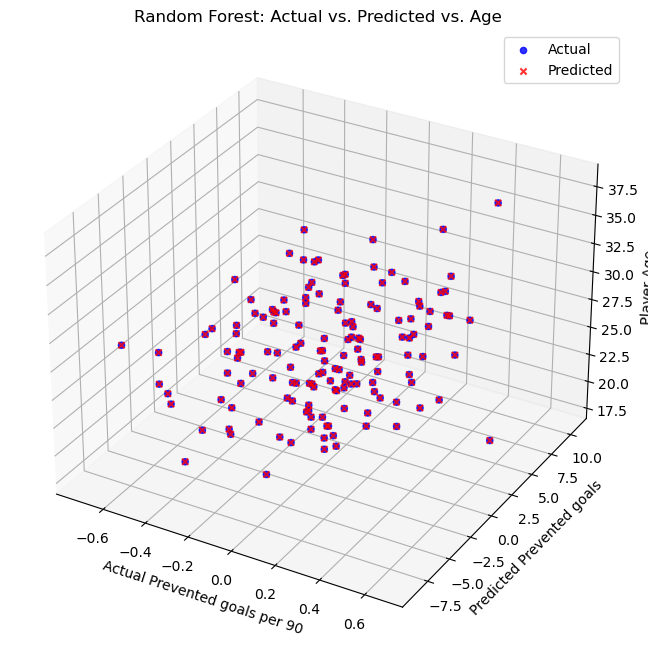

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Predictions on the test set
y_pred_test_rf_goalkeepers = model_rf_goalkeepers.predict(X_test_goalkeepers)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values (in blue)
scatter_actual = ax.scatter(
    X_test_goalkeepers['Prevented goals per 90'],  # x-axis: Actual Prevented goals per 90
    y_pred_test_rf_goalkeepers,                    # y-axis: Predicted Prevented goals
    X_test_goalkeepers['Age'],                     # z-axis: Player Age
    c='blue',                                      # color for actual values
    marker='o',                                    # marker style for actual values
    alpha=0.8,
    label='Actual'
)

# Scatter plot for predicted values (in red)
scatter_predicted = ax.scatter(
    X_test_goalkeepers['Prevented goals per 90'],  # x-axis: Actual Prevented goals per 90
    y_pred_test_rf_goalkeepers,                    # y-axis: Predicted Prevented goals
    X_test_goalkeepers['Age'],                     # z-axis: Player Age
    c='red',                                       # color for predicted values
    marker='x',                                    # marker style for predicted values
    alpha=0.8,
    label='Predicted'
)

# Add labels and title
ax.set_xlabel('Actual Prevented goals per 90')
ax.set_ylabel('Predicted Prevented goals')
ax.set_zlabel('Player Age')
ax.set_title('Random Forest: Actual vs. Predicted vs. Age')

# Add legend
ax.legend()

plt.show()


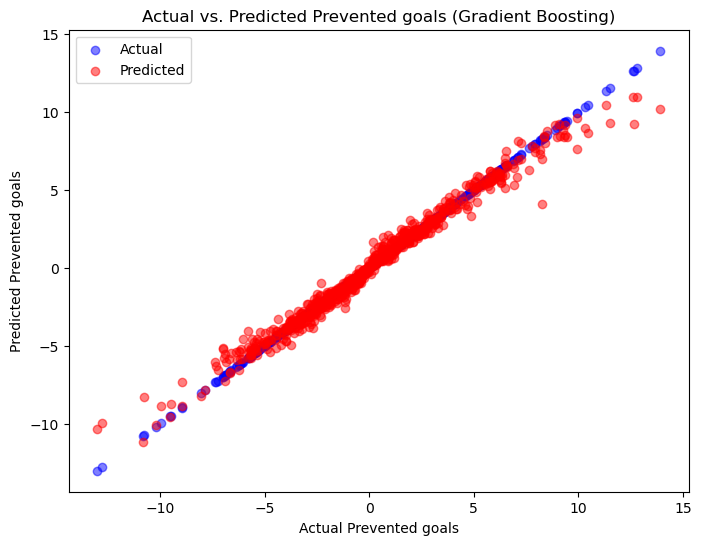

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Create a Gradient Boosting Regressor
model_gb_goalkeepers = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
y_cv_pred_gb = cross_val_predict(model_gb_goalkeepers, X_goalkeepers, y_goalkeepers, cv=5)

# Create a scatter plot for cross-validated predictions using Gradient Boosting
plt.figure(figsize=(8, 6))

# Scatter plot for actual values (in blue)
plt.scatter(
    y_goalkeepers,
    y_goalkeepers,
    color='blue',
    alpha=0.5,
    label='Actual'
)

# Scatter plot for predicted values (in red)
plt.scatter(
    y_goalkeepers,
    y_cv_pred_gb,
    color='red',
    alpha=0.5,
    label='Predicted'
)

plt.title('Actual vs. Predicted Prevented goals (Gradient Boosting)')
plt.xlabel('Actual Prevented goals')
plt.ylabel('Predicted Prevented goals')
plt.legend()
plt.show()


In [87]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fit the model on the entire dataset
model_gb_goalkeepers.fit(X_goalkeepers, y_goalkeepers)

# Predict on the entire dataset
y_pred_gb = model_gb_goalkeepers.predict(X_goalkeepers)

# Compute Mean Absolute Error
mae_gb = mean_absolute_error(y_goalkeepers, y_pred_gb)

# Compute R-squared
r2_gb = r2_score(y_goalkeepers, y_pred_gb)

print(f"Mean Absolute Error (Gradient Boosting): {mae_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")


Mean Absolute Error (Gradient Boosting): 0.1800841312857759
R-squared (Gradient Boosting): 0.9964585460698362


In [100]:
# Gradient Boosting Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, scoring='neg_mean_absolute_error', cv=5)
grid_gb.fit(X_goalkeepers, y_goalkeepers)

# Best hyperparameters for Gradient Boosting
best_params_gb = grid_gb.best_params_

# Cross-Validation Mean Absolute Error for Gradient Boosting
cv_scores_gb = -cross_val_score(grid_gb.best_estimator_, X_goalkeepers, y_goalkeepers, cv=5, scoring='neg_mean_absolute_error').mean()

print("Gradient Boosting Best Hyperparameters:", best_params_gb)
print("Gradient Boosting Cross-Validation Mean Absolute Error:", cv_scores_gb)


Gradient Boosting Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Gradient Boosting Cross-Validation Mean Absolute Error: 0.27204819349905934
